In [20]:
import sympy as sy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
a_0 = sy.Symbol('a_0')
A_01 = sy.Symbol('A_{{01}}')
A_10 = sy.Symbol('A_{{10}}')
A_ij = sy.Symbol('A_{{ij}}')
C_ij = sy.Symbol('C_{{ij}}')
Delta_t = sy.Symbol('\\Delta t')
E_0 = sy.Symbol('E_0')
E_1 = sy.Symbol('E_1')
E_i = sy.Symbol('E_i')
E_j = sy.Symbol('E_j')
g_0 = sy.Symbol('g_0')
g_1 = sy.Symbol('g_1')
g_i = sy.Symbol('g_i')
g_j = sy.Symbol('g_j')
gamma_ij = sy.Symbol('\\gamma_{{ij}}')
h = sy.Symbol('h')
I = sy.Identity(2)
k_B = sy.Symbol('k_B')
m_e = sy.Symbol('m_e')
N_e = sy.Symbol('N_e')
n_0 = sy.Symbol('n_0')
n_1 = sy.Symbol('n_1')
n_t = sy.MatrixSymbol('n_t', 2, 2)
P_ij = sy.MatrixSymbol('P_{{ij}}', 2, 2)
q = sy.Symbol('q')
# R_ij = sy.Symbol('R_{{ij}}', commutative=False)
R_ij = sy.MatrixSymbol('R_{{ij}}', 2, 2)
Ry = sy.Symbol('Ry')
T = sy.Symbol('T')
T_e = sy.Symbol('T_e')

In [3]:
constants = {
    a_0: 5.2917721090380e-9, # cm
    gamma_ij: 1.0,
    h: 6.58211951440e-16, # eV * s
    k_B: 8.617333262e-5, # eV * K^{-1}
    m_e: 5.68563010362509e-16, # cm^{-2} * eV * s^2
    Ry: 13.60569312299426, # eV
}

In [4]:
q_ij = (
    + 2 * sy.sqrt(sy.pi) * a_0 * h
    / m_e
    * sy.sqrt(Ry / (k_B * T_e))
    * gamma_ij / g_i
    * sy.exp(-(E_j - E_i) / (k_B * T))
)

In [5]:
q_ji = (
    + 2 * sy.sqrt(sy.pi) * a_0 * h
    / m_e
    * sy.sqrt(Ry / (k_B * T_e))
    * gamma_ij / g_j
)

In [6]:
C_ij = q * N_e

In [7]:
P_ij = C_ij + A_ij

In [8]:
P_00 = P_ij.subs({q: 0, A_ij: 0})
P_01 = P_ij.subs(q, q_ij).subs(A_ij, A_01).subs(g_i, g_0).subs(g_j, g_1).subs(E_i, E_0).subs(E_j, E_1)
P_10 = P_ij.subs(q, q_ji).subs(A_ij, A_10).subs(g_i, g_0).subs(g_j, g_1)
P_11 = P_ij.subs({q: 0, A_ij: 0})

In [9]:
P = sy.Matrix([[P_00, P_01], [P_10, P_11]])
P

Matrix([
[                                                                         0, A_{{01}} + 2*sqrt(pi)*N_e*\gamma_{{ij}}*a_0*h*sqrt(Ry/(T_e*k_B))*exp((E_0 - E_1)/(T*k_B))/(g_0*m_e)],
[A_{{10}} + 2*sqrt(pi)*N_e*\gamma_{{ij}}*a_0*h*sqrt(Ry/(T_e*k_B))/(g_1*m_e),                                                                                                   0]])

$$
\begin{pmatrix}
\frac{dn_0}{dt} \\
\frac{dn_1}{dt}
\end{pmatrix}
=
\begin{pmatrix}
-P_{01} & P_{10} \\
P_{01}  & -P_{10}
\end{pmatrix}
\begin{pmatrix}
n_0 \\
n_1
\end{pmatrix}
=
\begin{pmatrix}
-P_{01} n_0 + P_{10} n_1 \\
P_{01} n_0 - P_{10} n_1
\end{pmatrix}
$$

In [115]:
R = sy.Matrix([[-P[0, 1], P[1, 0]], [P[0, 1], -P[1, 0]]])
R

Matrix([
[-A_{{01}} - 2*sqrt(pi)*N_e*\gamma_{{ij}}*a_0*h*sqrt(Ry/(T_e*k_B))*exp((E_0 - E_1)/(T*k_B))/(g_0*m_e),  A_{{10}} + 2*sqrt(pi)*N_e*\gamma_{{ij}}*a_0*h*sqrt(Ry/(T_e*k_B))/(g_1*m_e)],
[ A_{{01}} + 2*sqrt(pi)*N_e*\gamma_{{ij}}*a_0*h*sqrt(Ry/(T_e*k_B))*exp((E_0 - E_1)/(T*k_B))/(g_0*m_e), -A_{{10}} - 2*sqrt(pi)*N_e*\gamma_{{ij}}*a_0*h*sqrt(Ry/(T_e*k_B))/(g_1*m_e)]])

In [11]:
n_i = (
    + g_i * sy.exp(-E_i / (k_B * T))
    / (g_0 * sy.exp(-E_0 / (k_B * T)) + g_1 * sy.exp(-E_1 / (k_B * T)))
)
n_i

g_i*exp(-E_i/(T*k_B))/(g_0*exp(-E_0/(T*k_B)) + g_1*exp(-E_1/(T*k_B)))

In [12]:
levels_12P3P4_12P1D4 = {
    # 12P3P4
    g_0: 9,
    E_0: 0, # eV

    # 12P1D4
    g_1: 5,
    E_1: 1.957696455240094, # eV

    A_01: 0,

    A_10: ( # 0.00149507
        + (
            + 2.11e-05 * (2 * 2 + 1)
            + 0.00563 * (2 * 2 + 1)
            + 0.00182 * (2 * 2 + 1)
            + 3.39e-06 * (2 * 2 + 1)
            + 8.6e-07 * (2 * 2 + 1)
        )
        / ((2 * 2 + 1) + (2 * 2 + 1) + (2 * 2 + 1) + (2 * 2 + 1) + (2 * 2 + 1))
    ),
}

levels_12P3P4_13S3S = {
    # 12P3P4
    g_0: 9,
    E_0: 0, # eV

    # 13S3S
    g_1: 3,
    E_1: 9.511695728174285, # eV

    A_01: 0,

    A_10: 1830,
}

variables = {
    T: 1e4, # K
    T_e: 1e4, # K
}

In [13]:
def population():
    n_0 = n_i.subs({g_i: g_0, E_i: E_0})
    n_1 = n_i.subs({g_i: g_1, E_i: E_1})
    n = sy.Matrix([[n_0], [n_1]])
    return n

n = population()

In [105]:
dn_1 = (R * sy.Matrix([[n_0], [n_1]]))[1].simplify().expand().collect(N_e)
sy.Eq(0, dn_1)

Eq(0, A_{{01}}*n_0 - A_{{10}}*n_1 + N_e*(-2*sqrt(pi)*\gamma_{{ij}}*a_0*h*n_1*sqrt(Ry/(T_e*k_B))/(g_1*m_e) + 2*sqrt(pi)*\gamma_{{ij}}*a_0*h*n_0*sqrt(Ry/(T_e*k_B))*exp(E_0/(T*k_B))*exp(-E_1/(T*k_B))/(g_0*m_e)))

In [40]:
count = int(1e3)
electron_number_densities = np.linspace(1.0e1, 1.0e30, num=count)
# electron_number_densities = np.linspace(1.0e20, 1.0e30, num=count)

n_1_ = sy.solve(
    dn_1
        .subs(constants)
        .subs(variables)
        .subs(levels_12P3P4_13S3S)
        .n()
        .subs(n_0, 1 - n_1),
    n_1
)[0]

n_1__ = [
    n_1_.subs(N_e, N_e_)
    for N_e_ in electron_number_densities
]

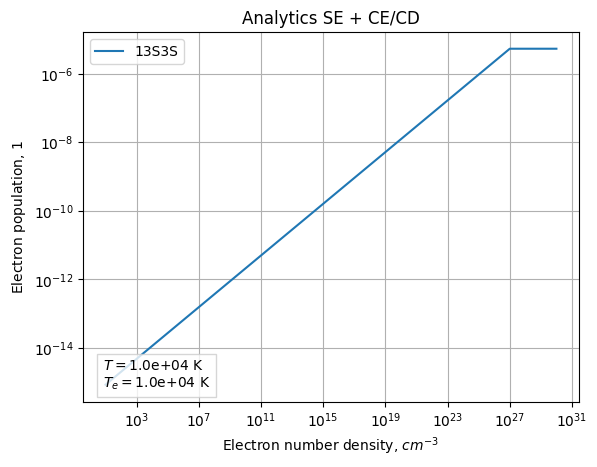

In [48]:
fig, ax = plt.subplots()

plt.plot(electron_number_densities, n_1__, label="13S3S")
plt.title("Analytics SE + CE/CD")
plt.xlabel("Electron number density, $cm^{-3}$")
plt.ylabel("Electron population, $1$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.text(
    0.04,
    0.04,
    f"$T = ${'{:.1e}'.format(variables[T])} K\n"
    f"$T_e = ${'{:.1e}'.format(variables[T_e])} K",
    transform = ax.transAxes,
    bbox={'facecolor': 'white', 'alpha': 0.8, 'edgecolor': (0.8, 0.8, 0.8)}
)
plt.grid()
plt.show()

In [103]:
count = int(1e3)
temperatures = np.linspace(1.0e4, 1.0e30, num=count)
# temperatures = np.logspace(1.0e4, 1.0e30, num=count)
# temperatures = np.geomspace(1.0e4, 1.0e30, num=count)

N_e_ = 1.0e27

n_1_ = sy.solve(
    dn_1
        .subs(constants)
        .subs(levels_12P3P4_13S3S)
        .subs(N_e, N_e_)
        .subs(T_e, T)
        # .subs(T_e, 1.0e4)
        .subs(n_0, 1 - n_1)
        .n(),
    n_1
)[0]

n_1__ = [
    n_1_.subs(T, T_)
    for T_ in temperatures
]

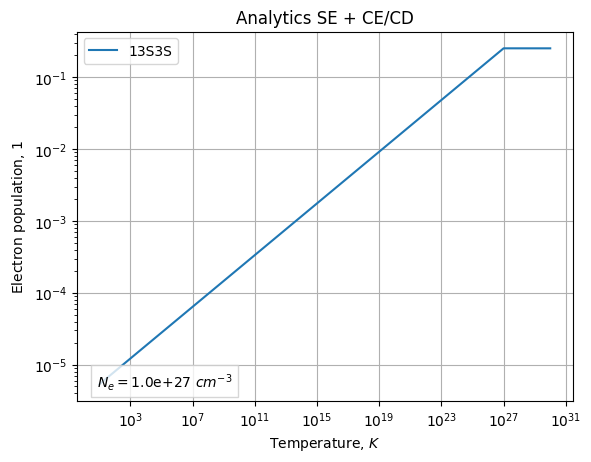

In [104]:
fig, ax = plt.subplots()

plt.plot(electron_number_densities, n_1__, label="13S3S")
plt.title("Analytics SE + CE/CD")
plt.xlabel("Temperature, $K$")
plt.ylabel("Electron population, $1$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.text(
    0.04,
    0.04,
    f"$N_e = ${'{:.1e}'.format(N_e_)} $cm^{{-3}}$",
    transform = ax.transAxes,
    bbox={'facecolor': 'white', 'alpha': 0.8, 'edgecolor': (0.8, 0.8, 0.8)}
)
plt.grid()
plt.show()

In [15]:
sy.solve(dn_1.subs(constants).subs(variables).subs(levels_12P3P4_13S3S).n().subs(N_e, 5e25).subs(n_0, 1 - n_1), n_1)[0]

5.36034513744370e-6

In [16]:
sy.solve(dn_1.subs(constants).subs(variables).subs(levels_12P3P4_13S3S).n().subs(n_0, 1 - n_1).subs(n_1, 5.36034513744371e-6), N_e)[0]

-1.29530540182991e+26

In [17]:
sy.solve(dn_1.subs(constants).subs(variables).subs(levels_12P3P4_12P1D4).n().subs(N_e, 8e19).subs(n_0, 1 - n_1), n_1)[0]

0.0541872451709805

In [18]:
sy.solve(dn_1.subs(constants).subs(variables).subs(levels_12P3P4_12P1D4).n().subs(n_0, 1 - n_1).subs(n_1, 0.0541872451709805), N_e)[0]

-3.91758333831037e+20